In [2]:
import pandas as pd
import numpy as np

In [3]:
from fastbook import * 
from pathlib import Path 

In [4]:
# searches = ('beer', 'white rum','dark rum', 'tequila', 'whiskey', 'vodka', 'simple syrup', 'lime juice', 'grenadine', 'pineapple juice', 'cranberry juice')
searches = ('beer', 'whiskey', 'vodka')
path = Path('alcohol_images')

if not path.exists():
    path.mkdir(parents=True, exist_ok=True)
    for alcohol in searches: 
        dest = path / alcohol
        dest.mkdir(parents=True, exist_ok=True)
        results = search_images_ddg(f'{alcohol} photo')
        download_images(dest, urls=results[:200])
        resize_images(dest, max_size=400, dest=dest)

In [5]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#15) [None,None,None,None,None,None,None,None,None,None...]

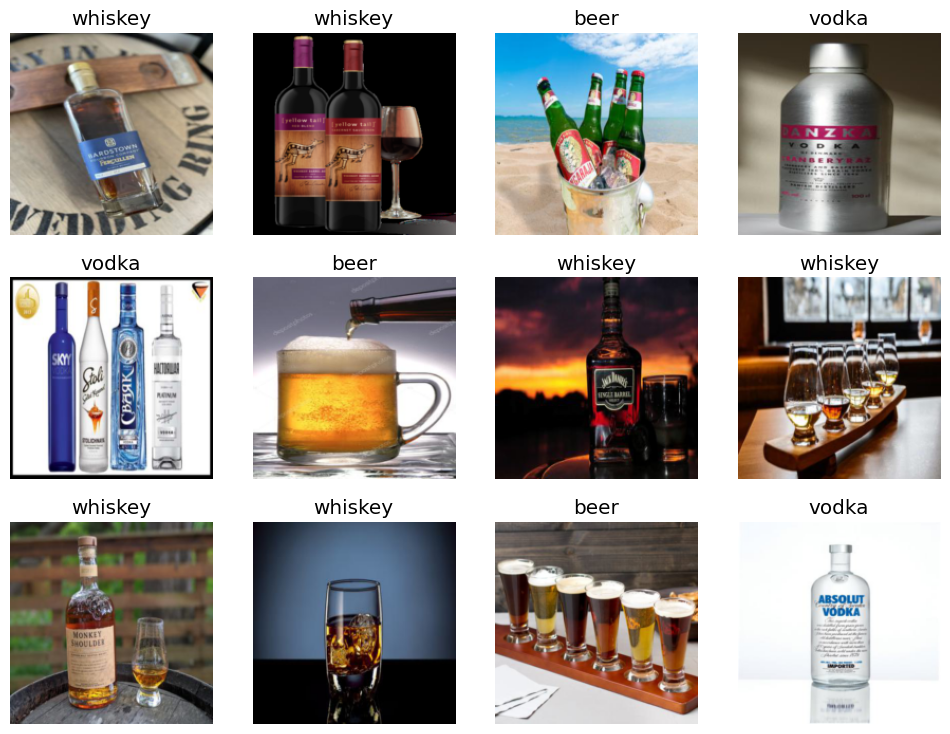

In [6]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, 
    item_tfms= [Resize(192,method='squish')],
).dataloaders(path)

dls.show_batch(max_n=12) # easy to just look at data

In [7]:
learn = vision_learner(dls, resnet18, metrics=error_rate) # vision_learner is the new name  
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.511968,1.139337,0.354545,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.706073,0.922656,0.309091,00:02
1,0.500410,0.758234,0.281818,00:02
2,0.365251,0.704923,0.218182,00:02
3,0.291547,0.689272,0.218182,00:02


In [13]:
alcohol_type, _, probs = learn.predict(PILImage.create('data/beer.jpg'))
print(f"This is a: {alcohol_type}.")
print(f"Probability it's a beer: {probs[0]:.4f}")
print(f"Probability it's a vodka: {probs[1]:.4f}")
print(f"Probability it's a whiskey: {probs[2]:.4f}")


This is a: vodka.
Probability it's a beer: 0.0583
Probability it's a vodka: 0.8650
Probability it's a whiskey: 0.0767


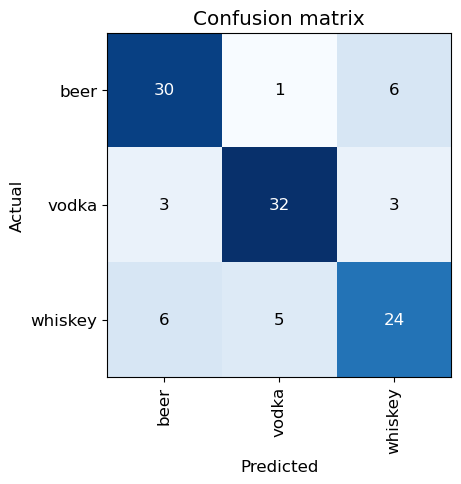

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# learn.save('alcohol_classifier')